In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

Dataset importing

In [3]:
data_coca = pd.read_excel("C:/Users/Prashant/Downloads/CocaCola_Sales_Rawdata.xlsx")

Understanding the data

In [4]:
data_coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
data_coca.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


EDA

In [7]:
data_coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
data_coca.shape

(42, 2)

In [9]:
data_coca.columns

Index(['Quarter', 'Sales'], dtype='object')

In [10]:
data_coca.nunique()

Quarter    42
Sales      42
dtype: int64

In [11]:
data_coca['Quarter'].unique()

array(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87',
       'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89',
       'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91',
       'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92',
       'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94',
       'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
      dtype=object)

In [12]:
data_coca['Sales'].unique()

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

Cleaning The Data

In [13]:
data_coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

Relationship Analysis

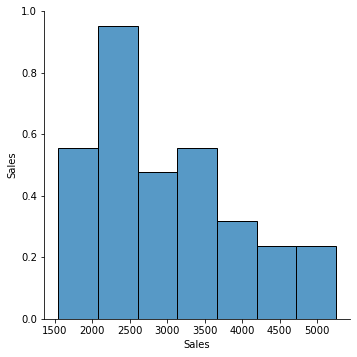

In [14]:
sns.pairplot(data_coca, height = 5)

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

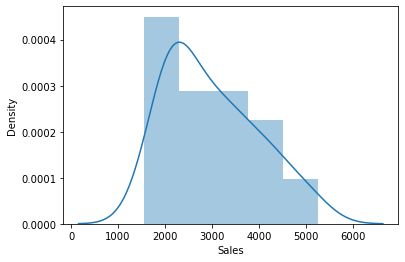

In [15]:
sns.distplot(data_coca['Sales'], bins=5)

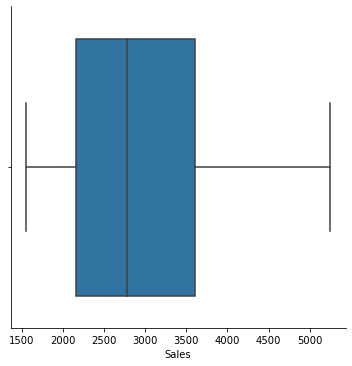

In [16]:
sns.catplot(x= 'Sales',kind ='box', data=data_coca)

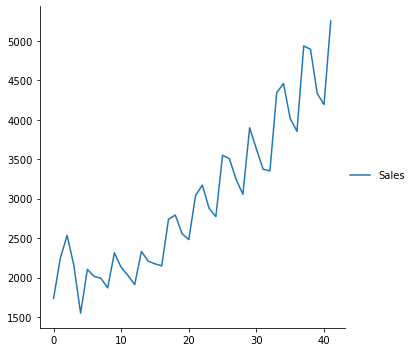

In [17]:
sns.relplot(data=data_coca, kind="line")

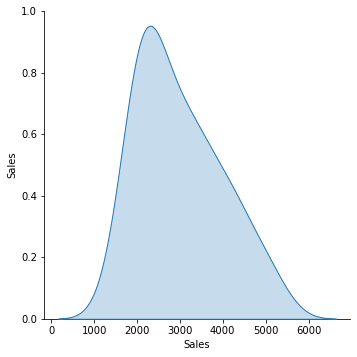

In [18]:
g = sns.pairplot(data_coca, diag_kind="kde", height = 5)
g.map_lower(sns.kdeplot, levels=4, color=".2")

Splitting Data

In [19]:
Train = data_coca.head(30)
Test = data_coca.tail(12)

Moving Average

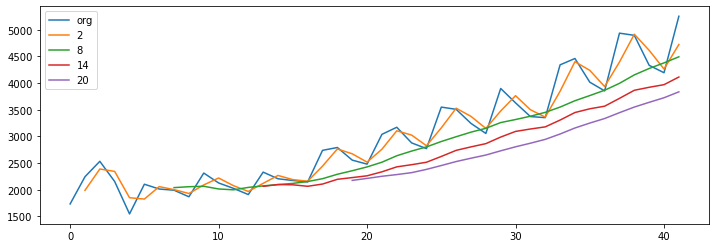

In [21]:
plt.figure(figsize=(12,4))
data_coca.Sales.plot(label="org")
for i in range(2,24,6):
    data_coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot

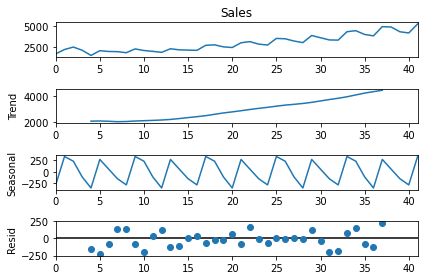

In [22]:
decompose_ts_add = seasonal_decompose(data_coca.Sales,period=8)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

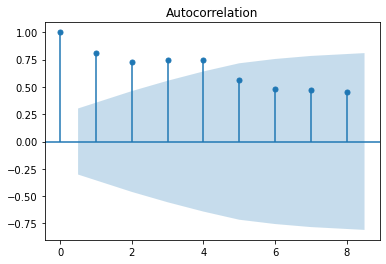

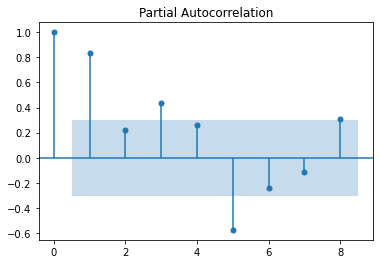

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_coca.Sales,lags=8)
tsa_plots.plot_pacf(data_coca.Sales,lags=8)
plt.show()

Evaluation Metric MAPE


In [24]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


Simple Exponential Method


In [26]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

22.04676208763459

Holt Method

In [28]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-28-8b6f962a88ff>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213840900969231

Holts winter exponential smoothing with additive seasonality and additive trend

In [30]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.83720495944261

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.76289140146596

Final Model by combining train and test

In [33]:
hwe_model_add_add = ExponentialSmoothing(data_coca["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()


In [34]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4952.599860
43    4771.758098
44    4801.779667
45    5676.634556
46    5713.163216
47    5290.665128
48    5166.840196
49    6122.570866
50    6007.644296
51    5541.894870
dtype: float64